* word frequency analysis,
* sentence length analysis,
* average word length analysis,

To explore the fundamental characteristics of the text data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.chdir('C:\\Users\\akadali\\Desktop\\Deep_NLP\\MLG_Capstone_ChatBot\\ChatBot_GoogleW2V')

In [3]:
data = pd.read_csv('data_Preprocessed.csv', encoding = 'latin1')

In [4]:
data.head()

,Subject,Body,email_cleaned,tw_pre_cleaning,tc_pre_cleaning,tw_post_cleaning,tc_post_cleaning,verbs,lines
0,Requisition code: S20COLCF21JULJS-SO,"Hello,\r\n\r\n \r\n\r\nI have a candidate refe...",I have a candidate referral who is interested ...,74,657,13,78,3,1
1,FW: Hired: Sourabh Mahajan,"Hello Referral Team,\r\n\r\n \r\n\r\nHis recru...",His recruiter was on leave for 2 months. Is it...,854,7113,20,104,4,1
2,Talent Referral - SAP P2P MM Ariba,"Hi Team,\r\n\r\n \r\n\r\nI currently do not ha...",I currently do not have access to the US Talen...,62,394,56,315,13,1
3,Candidate Referral,"Hi, \r\n\r\nI have a few experienced candidate...",I have a few experienced candidates to refer t...,73,488,47,264,13,1
4,Referral Question,"Hi,\r\n\r\nI have a referral that has been wit...",I have a referral that has been with the compa...,32,195,22,110,5,1


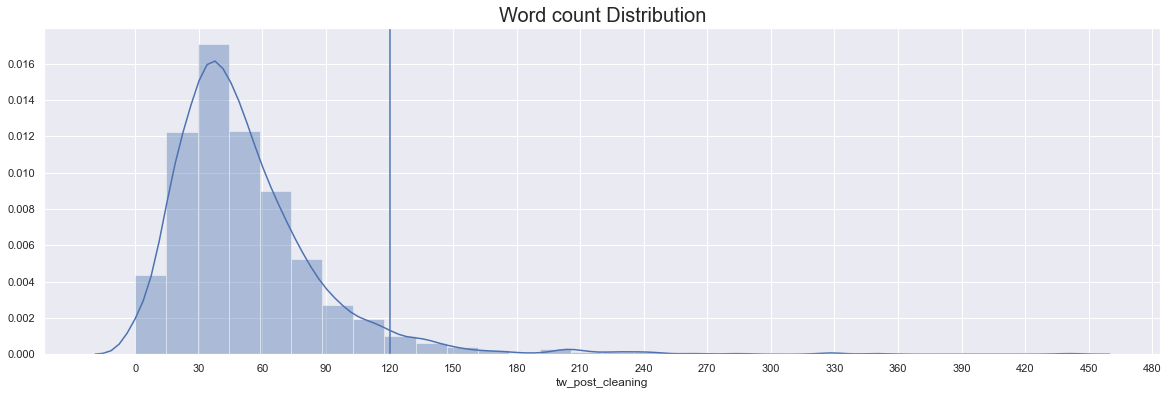

In [8]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.distplot(data["tw_post_cleaning"], bins=30)
plt.title("Word count Distribution", fontsize = 20)
plt.axvline(120)
plt.xticks(np.arange(0,500,30))
plt.show()

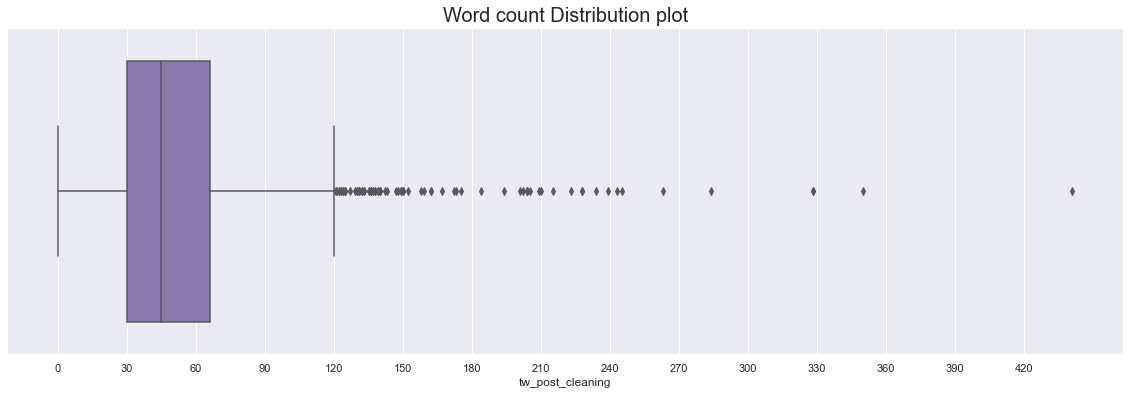

In [11]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x=data['tw_post_cleaning'], color = 'm')
#plt.axvline(36,0, linestyle = "--", color = 'red')
plt.title("Word count Distribution plot", fontsize = 20)
plt.xticks(np.arange(0,450,30))
plt.show()

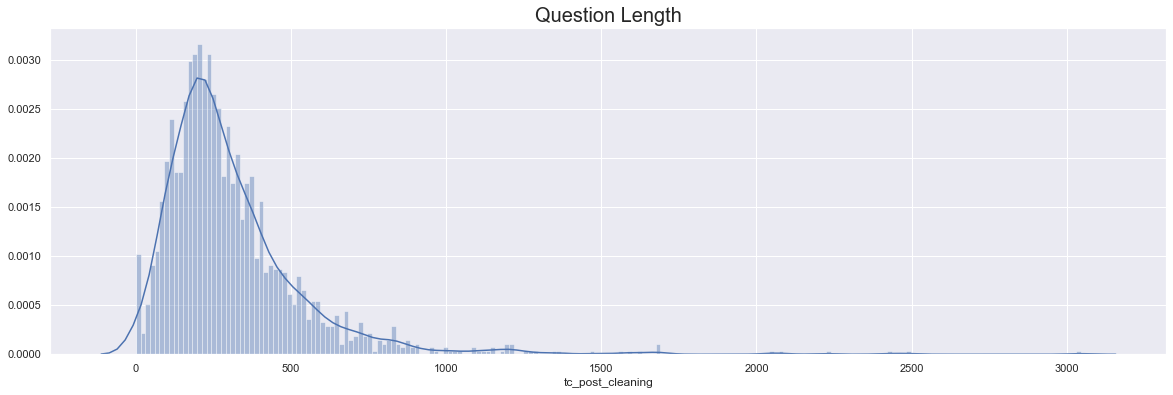

In [7]:
sns.distplot(data["tc_post_cleaning"], bins = 200)
plt.title("Question Length", fontsize = 20)
#plt.xticks(np.arange(0,500,30))
plt.show()

* From the above it is evident that emails with more than 120 words are outliers
* These emails to be removed as we are going to need only those emails with minimal text that can be given as input questions to the bot

In [12]:
#Dropping the records with more than 120 words - There are 80 such rferral queries with more than 80 words
data.drop(data[data['tw_post_cleaning']>120].index, inplace = True)

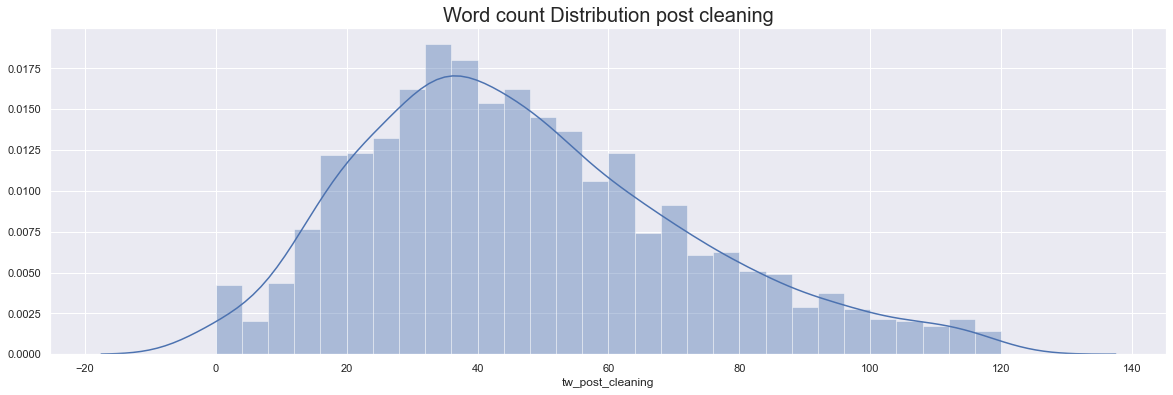

In [14]:
#Word Count Distribution post removing large emails
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.distplot(data["tw_post_cleaning"], bins=30)
plt.title("Word count Distribution post cleaning", fontsize = 20)
#plt.axvline(210)
#plt.xticks(np.arange(0,500,30))
plt.show()

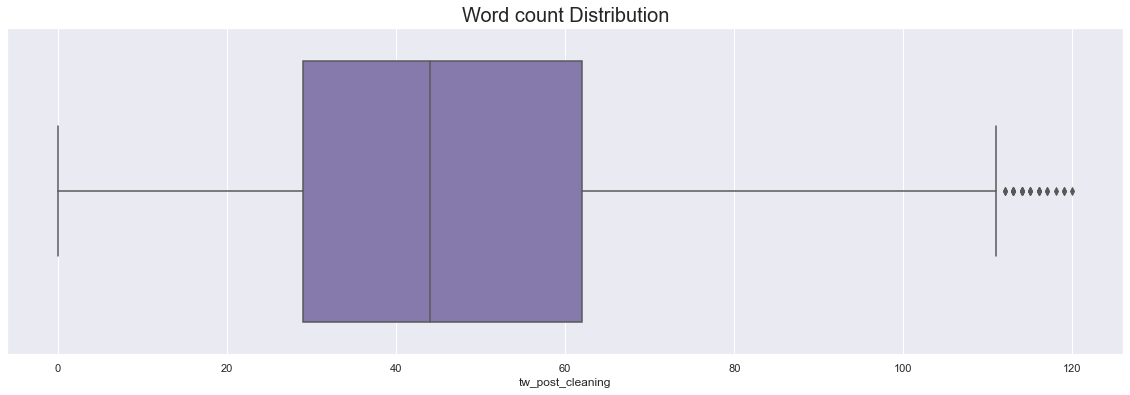

In [15]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x=data['tw_post_cleaning'], color = 'm')
#plt.axvline(36,0, linestyle = "--", color = 'red')
plt.title("Word count Distribution", fontsize = 20)
#plt.xticks(np.arange(0,450,30))
plt.show()

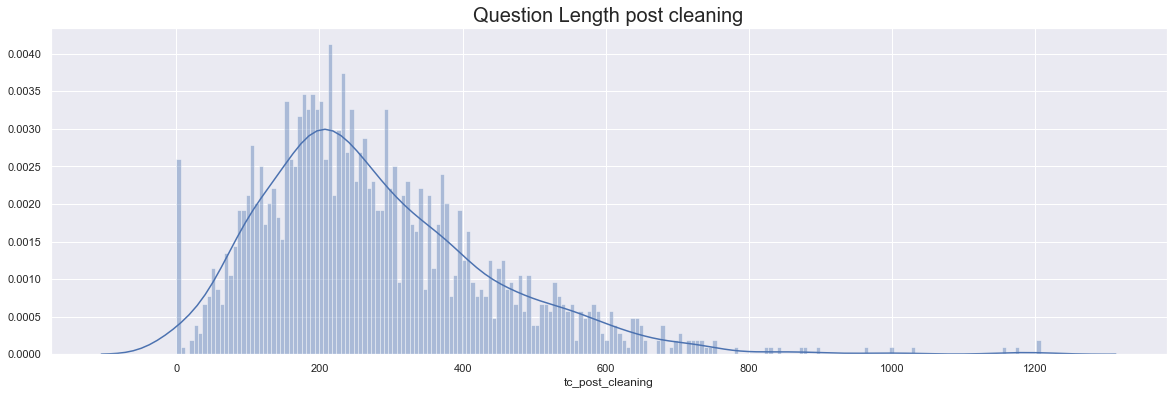

In [16]:
sns.distplot(data["tc_post_cleaning"], bins = 200)
plt.title("Question Length post cleaning", fontsize = 20)
#plt.xticks(np.arange(0,500,30))
plt.show()

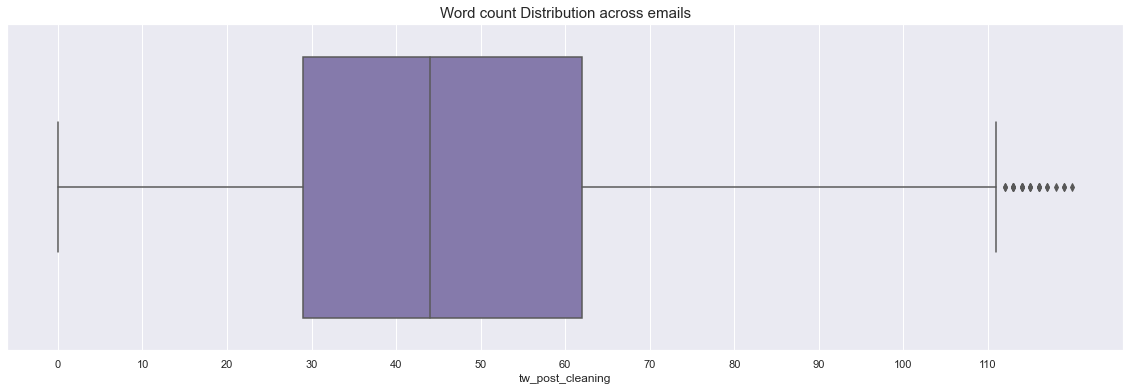

In [11]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x=data['tw_post_cleaning'], color = 'm')
#plt.axvline(36,0, linestyle = "--", color = 'red')
plt.title("Word count Distribution across emails", fontsize = 15)
plt.xticks(np.arange(0,120,10))
plt.show()

* Majority of emails have text lengths between 30 and 60 words.

In [12]:
import nltk
from nltk import blankline_tokenize, word_tokenize
from collections import Counter
def ver_counter(email):
    paras_ = blankline_tokenize(str(email)) #divdes the email into small paragraphs
    verbs_ = 0
    for line in paras_:
        tokens = nltk.word_tokenize(line.lower())  
        text = nltk.Text(tokens)
        tags = nltk.pos_tag(text)
        counts = Counter(tag for word,tag in tags)
        verbs_ = counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBZ']
    return verbs_


def line_counter(email):
    paras_ = blankline_tokenize(str(email)) #divdes the email into small paragraphs
    return len(paras_)

In [13]:
data['verbs'] = data['email_cleaned'].apply(lambda x:ver_counter(x))
data['lines'] = data['email_cleaned'].apply(lambda x:line_counter(x))

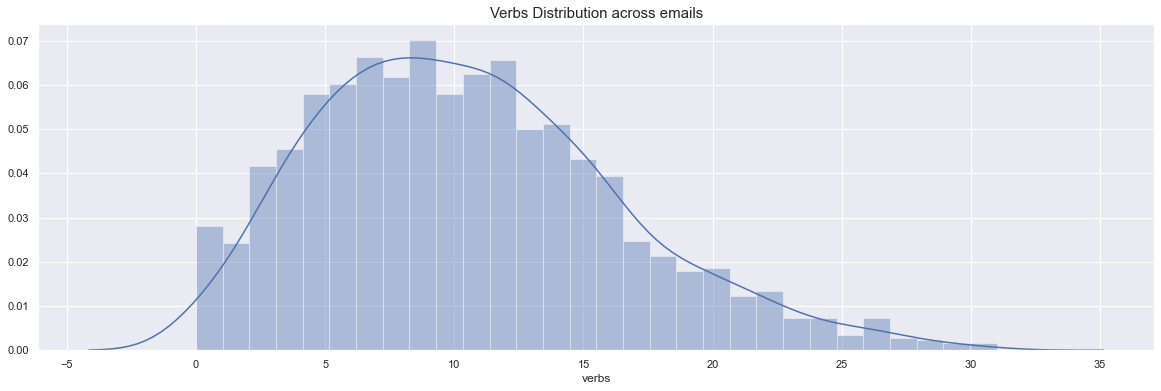

In [14]:
sns.distplot(data["verbs"], bins=30)
plt.title("Verbs Distribution across emails", fontsize = 15)
#plt.xticks(np.arange(0,500,30))
plt.show()

Text Mining/Text Analytics
-------

Data Clean-up
**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Remove contractions
* Remove stop words
* Tokenize text

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And mor

In [19]:
col = 'email_cleaned'
import nltk

#Specifying the field datatype
data[col] = data[col].astype(str)
  
#Converting data to lower case 
import string
data[col] = data[col].apply(lambda x: x.lower())

#Removing Punctuations
import re
puncs = string.punctuation
puncs = puncs + "’'`"
data[col] = data[col].apply(lambda x: re.sub('[%s]'%re.escape(puncs), ' ', x))

#Removing Stop Words
stops = nltk.corpus.stopwords.words('english')
data[col] = data[col].apply(lambda x: " ".join(w for w in x.split() if w not in stops))

In [20]:
#The text data has a lot of contractions and all of them need to be cleared to 
#avoid any unsual characters after preprocessing the text
def text_clean(text):
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\r", " ", text)
    return text

#Applying the above function
data[col] = data[col].apply(lambda x: text_clean(x))

In [21]:
#We still have some extra spaces present in the data. Let’s remove them
#Removing extra spaces that might have been created while removing punctuations
data[col] = data[col].apply(lambda x: re.sub('  +',' ',x))

In [22]:
#tokenizing the text

from nltk.tokenize import word_tokenize
corpus = " ".join(data[col])
tokens = word_tokenize(corpus)
print("Total number of words in the corpus - ", len(tokens))

Total number of words in the corpus -  44519


In [23]:
#Function to get the unique list of words
def unique_list(text):
    unique_list = []
    for w in text.split():
        if w not in unique_list:
            unique_list.append(w)
    return unique_list

#Getting Lemmas for corpus tokens
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
lems = " ".join(lemma.lemmatize(w, pos = 'v') for w in tokens)
unique_lems = unique_list(lems)
print("Number of unique (root) words in corpus - ", len(unique_lems))

Number of unique (root) words in corpus -  5090


In [24]:
#Finding word frequencies of all words in the corpus tokens
from nltk.probability import FreqDist
fdist = FreqDist()

for word in tokens:
    fdist[word] += 1
    

#Top 20 tokens with highest frequency 
fdist_top20 = fdist.most_common(20)
word_freq = pd.DataFrame(fdist_top20)
word_freq.columns = ['word','freq']

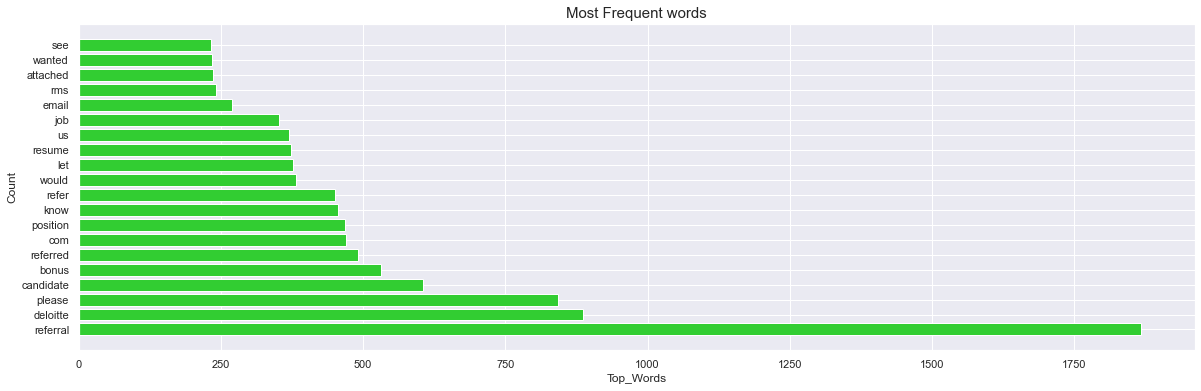

In [25]:
#Bar Chart to show the top 20 most frequent words
#plt.rcParams['figure.figsize'] = [10, 6]
plt.barh(word_freq['word'],word_freq['freq'], color = 'limegreen')
plt.xlabel("Top_Words")
plt.ylabel("Count")
plt.title("Most Frequent words", fontsize = 15)
plt.show()

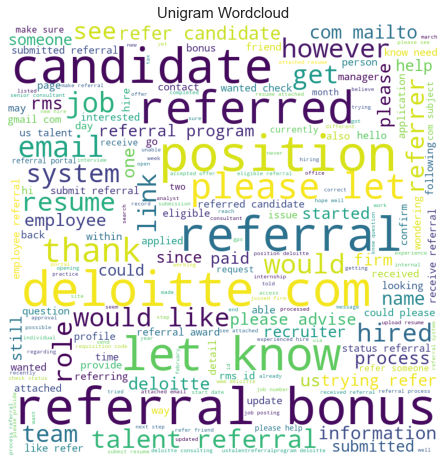

In [38]:
#Let's Generate a wordcloud to observer the highligted words over the entire corpus
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                        
plt.figure(figsize = (6, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Unigram Wordcloud", fontsize = 15)
plt.tight_layout(pad = 0) 
plt.show() 

In [40]:
#Lets get the bigrams and trigrams
from nltk import ngrams
bigrams = list(ngrams(corpus.split(), 2))
trigrams = list(ngrams(corpus.split(), 3))

bigrams = pd.DataFrame(bigrams)
bigrams = bigrams[0] + "_" + bigrams[1] 

bigram_words = ' '
for val in bigrams:
    val = str(val)
    tokens = val.split()
    bigram_words += " ".join(tokens)+" "
    
#Top 20 bigrams
bigrams.value_counts()[:20]

referral_bonus        408
deloitte_com          384
let_know              341
please_let            271
would_like            136
talent_referral       127
com_mailto            112
refer_candidate       108
please_advise          95
trying_refer           91
referral_program       87
rms_id                 79
referred_candidate     73
submitted_referral     71
could_please           70
like_refer             70
receive_referral       66
wanted_check           64
status_referral        64
us_talent              64
dtype: int64

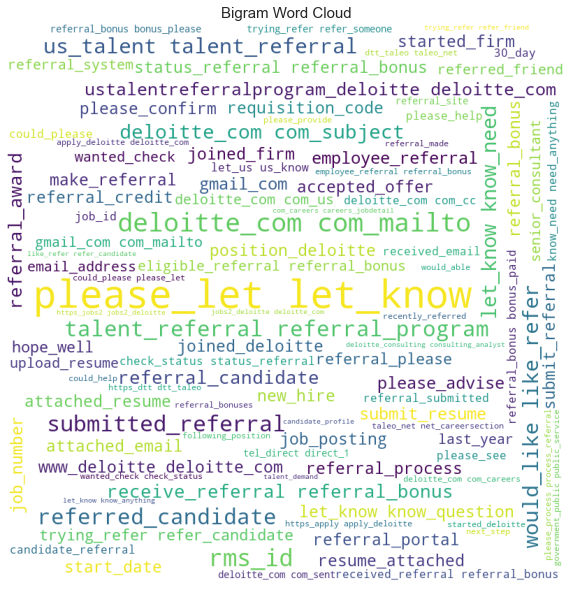

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(bigram_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Bigram Word Cloud", fontsize = 15)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [42]:
#Trigrams word clouds
trigrams = pd.DataFrame(trigrams)
trigrams = trigrams[0]+'_'+trigrams[1]+'_'+trigrams[2]
trigrams.value_counts()[:20]

please_let_know                         257
deloitte_com_mailto                      87
talent_referral_program                  60
would_like_refer                         58
us_talent_referral                       57
let_know_need                            56
deloitte_com_subject                     53
receive_referral_bonus                   44
ustalentreferralprogram_deloitte_com     40
www_deloitte_com                         35
let_know_questions                       30
status_referral_bonus                    30
trying_refer_candidate                   25
eligible_referral_bonus                  24
gmail_com_mailto                         23
deloitte_com_us                          23
know_need_anything                       22
received_referral_bonus                  22
check_status_referral                    21
referral_bonus_paid                      20
dtype: int64

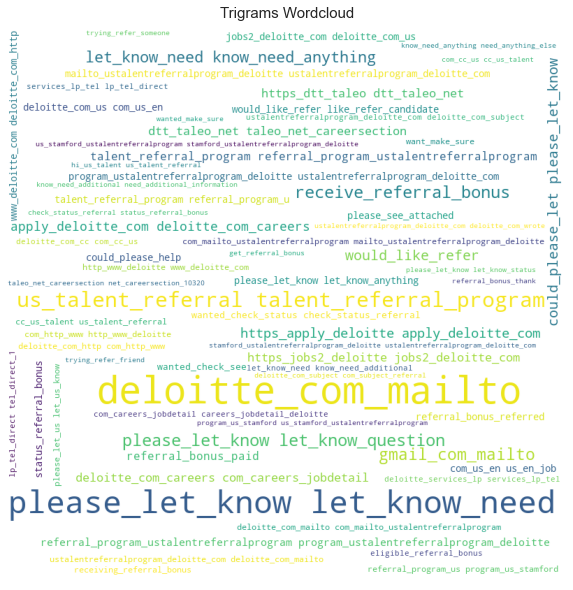

In [43]:
trigram_words = ' '
for val in trigrams:
    val = str(val)
    tokens = val.split()
    trigram_words += " ".join(tokens)+" "
    
bigram_words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(trigram_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Trigrams Wordcloud", fontsize = 15)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Key Observations
------------

* Initially our dataset had _27872_ emails in about 30K rows in a CSV sheet imported from Referral Program generic mailbox.
*  The entire data cleanup process has eliminated more than 26000 emails/records, which cannot be used for training the chatbot. We are currently looking for queries that can be answered/responded in first contact.
* At the end of data cleanup, we have 1732 preprocessed and cleaned question corpus, which we can use to train our chatbot
* Average no. of words in an email before cleaning the data - 197
* Average no. of words in an email after cleaning the data - 52
* Avg. no. of unnecessary words removed from all emails - 145 (This includes phrases such as "(US-Hyderabad)", "(US-Hermitage)", email addresses and all words that might occur in email signatures, email greetings etc.
* This eases our further analysis and helps us to train our bot on the quality questions.
* There are about 12 verbs at an average in every email - which helped us to deferrentiate email body texts from the 'signatures', 'greetings' and trial email texts which are not much of a use for us.


#### Learning from VDA

* From the above distribution charts, it was revealed that emails with more than 120 words are outliers and they are very less in number
* These emails to be removed as these lengthy texts are not going to help to train our bot
* From the above distribution charts, it is evident that majority of emails have text lengths between 30 and 60 words.
* From the above word clouds and ngram analysis, it's found that _referral, position, candidate, Deloitte_ are the most frequent unigrams in the corpus
* Following _'referral_bonus', 'please_let', 'would_like'_ are most frequent bigrams
* When the same analysis done on the smaller corpus collected from FAQs, '_campus_recruiting_' was the most occuring bigram, but post looking at the larger corpus from the mailbox, it revealed that Deloitte professionals have more questions regarding '_referral_bonus' 'referral_status' and 'Talent_referral_program'_.
* Further analysis is needed on the questions related to '_referral_bonus', 'Referral_Program'_, rather than the '_campus_recruiting'_ 
* Also, more number of answers are required for these queries


#### After Removing stopwords

* Total number of words in the corpus -  44519
* Number of unique (root) words in corpus -  5090

#### Other notable findings by closely looking at the employee queries
* Our current program FAQs in DNet are not clear enough for all employees to understand and needs upgradation. It is evident from the ngram analysis that many referres have questions on referral program. 
* Post submitting the referrals, many referrers are confused wheather it was successful or not, as the site doesn't let them upload the resume. There are many questions around not updating resumes. 
* Majority of the referrers are concerned about when they are going to receive the referral bonus paid and their referral candidates' hiring status (6K emails). Multiple back and forth.
* Right now, the only way to get this information is to reach out to the talent referral team and get their questions answered in an email. Our Chatbot can help them get the information they need by accessing various databases.
* Due to the lack of awareness on what info. to be provided to the team beforehand, the resolution TAT is going upto 72 Hours. This can be reduced by helping them understand the details needed for quick resolution of their inqiuiries. Chatbot can help them with such queries. 

In [31]:
tokens = nltk.word_tokenize(corpus)
text = nltk.Text(tokens)
tags = nltk.pos_tag(tokens)

In [32]:
counts = Counter(tag for word,tag in tags)

NameError: name 'Counter' is not defined

In [ ]:
pos_df = pd.DataFrame()
pos_df['keys'] = counts.keys()
pos_df['values'] = counts.values()

In [ ]:
pos_df = pos_df.sort_values(by = ['values'], ascending = False)

In [ ]:
pos_df.shape

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
plt.bar(pos_df['keys'][:20], pos_df['values'][:20])
plt.title("(Top 20) Parts of speech Tagging for questions", fontsize = 25)
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()

* Clearly nouns dominating in the entire dataset. Let's look at the top nouns in the dataset

In [ ]:
def get_pos(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

In [ ]:
words=data['email_cleaned'].apply(lambda x : get_pos(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)